## Starter: list available files and load CSVs

The next cell lists files in this project folder and attempts to load `sales.csv` and `StockDetails.csv` into pandas DataFrames.

In [1]:
import os
from pathlib import Path
import pandas as pd

base = Path('.').resolve()
print('Notebook working directory:', base)
print('Files in folder:')
for p in sorted(base.iterdir()):
    print('-', p.name)

# Try loading the expected CSV files (if present)
sales_path = base / 'sales.csv'
stock_path = base / 'StockDetails.csv'

dfs = {}
if sales_path.exists():
    dfs['sales'] = pd.read_csv(sales_path)
    print('Loaded `sales.csv` — rows:', len(dfs['sales']))
else:
    print('`sales.csv` not found in this folder')

if stock_path.exists():
    dfs['stock'] = pd.read_csv(stock_path)
    print('Loaded `StockDetails.csv` — rows:', len(dfs['stock']))
else:
    print('`StockDetails.csv` not found in this folder')

# Peek at loaded dataframes


Notebook working directory: D:\IITM-AIML-Course\git-repos\IITM-Weekly-Practise\Week_8_Graded_Mini_Project
Files in folder:
- IITM_Pravartak_Week 8_Questions_Graded Mini Project.docx
- Mini-Project Retail Stock and Sales Analysis_V2.pdf
- sales.csv
- StockDetails.csv
- week8_graded_mini_project.ipynb
Loaded `sales.csv` — rows: 9495
Loaded `StockDetails.csv` — rows: 1703


## Next steps
- Inspect columns and datatypes with `df.info()` and `df.describe()`
- Clean and pre-process data (missing values, date parsing, type conversions)
- Visualise key metrics and implement required analyses for the mini-project

In [16]:
import pandas as pd

sales_path = base / 'sales.csv'
stock_path = base / 'StockDetails.csv'

print('Sales dataset missing values')
sales = pd.read_csv(sales_path)
print(sales.info())


print('StockDetails dataset missing values')
stockdetails = pd.read_csv(stock_path)
print(stockdetails.info())

print('Duplicates in sales dataset')
print(sales[sales.duplicated()])

print('Duplicates in stocks dataset')
print(stockdetails[stockdetails.duplicated()])

Sales dataset missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9495 non-null   object 
 1   StockCode    9495 non-null   object 
 2   Description  9495 non-null   object 
 3   Quantity     9495 non-null   int64  
 4   InvoiceDate  9495 non-null   object 
 5   UnitPrice    9495 non-null   float64
 6   CustomerID   9495 non-null   int64  
 7   Country      9495 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 593.6+ KB
None
StockDetails dataset missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    1703 non-null   object
 1   Description  1703 non-null   object
dtypes: object(2)
memory usage: 26.7+ KB
None
Duplicates in sales data

In [ ]:
import pandas as pd

sales_path =  'sales.csv'
stock_path = 'StockDetails.csv'

sales_df =  pd.read_csv(sales_path)
stock_df = pd.read_csv(stock_path)

# Convert InvoiceDate to datetime and extract Invoice date, Month, Hour
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'], errors='coerce')
# Invoice date (date only)
sales_df['Invoice_date'] = sales_df['InvoiceDate'].dt.date
# Month number (1-12)
sales_df['Month'] = sales_df['InvoiceDate'].dt.month
# Hour of transaction (0-23)
sales_df['Hour'] = sales_df['InvoiceDate'].dt.hour
print('Converted InvoiceDate — NaT values:', sales_df['InvoiceDate'].isna().sum())
# Show sample of new columns
sales_df[['InvoiceDate', 'Invoice_date', 'Month', 'Hour']].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,01-12-2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,01-12-2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,01-12-2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01-12-2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,01-12-2010 13:04,1.95,12662,Germany
...,...,...,...,...,...,...,...,...
9490,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,09-12-2011 12:16,1.25,12713,Germany
9491,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,09-12-2011 12:16,0.85,12713,Germany
9492,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,09-12-2011 12:16,0.85,12713,Germany
9493,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,09-12-2011 12:16,2.08,12713,Germany


In [4]:
# Convert InvoiceDate to datetime and extract Invoice date, Month, Hour
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'], errors='coerce')
# Invoice date (date only)
sales_df['Invoice_date'] = sales_df['InvoiceDate'].dt.date
# Month number (1-12)
sales_df['Month'] = sales_df['InvoiceDate'].dt.month
# Hour of transaction (0-23)
sales_df['Hour'] = sales_df['InvoiceDate'].dt.hour
print('Converted InvoiceDate — NaT values:', sales_df['InvoiceDate'].isna().sum())
# Show sample of new columns
sales_df[['InvoiceDate', 'Invoice_date', 'Month', 'Hour']].head()

Converted InvoiceDate — NaT values: 5527


,InvoiceDate,Invoice_date,Month,Hour
0,2010-01-12 13:04:00,2010-01-12,1.0,13.0
1,2010-01-12 13:04:00,2010-01-12,1.0,13.0
2,2010-01-12 13:04:00,2010-01-12,1.0,13.0
3,2010-01-12 13:04:00,2010-01-12,1.0,13.0
4,2010-01-12 13:04:00,2010-01-12,1.0,13.0


In [7]:
import pandas as pd

sales_path =  'sales.csv'
stock_path = 'StockDetails.csv'

sales_df =  pd.read_csv(sales_path)
stock_df = pd.read_csv(stock_path)

sales_df['TotalPrice']=sales_df['Quantity']*sales_df['UnitPrice']
sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,01-12-2010 13:04,2.95,12662,Germany,17.70
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,01-12-2010 13:04,2.55,12662,Germany,15.30
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,01-12-2010 13:04,0.85,12662,Germany,10.20
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01-12-2010 13:04,1.65,12662,Germany,19.80
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,01-12-2010 13:04,1.95,12662,Germany,23.40
...,...,...,...,...,...,...,...,...,...
9490,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,09-12-2011 12:16,1.25,12713,Germany,15.00
9491,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,09-12-2011 12:16,0.85,12713,Germany,10.20
9492,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,09-12-2011 12:16,0.85,12713,Germany,10.20
9493,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,09-12-2011 12:16,2.08,12713,Germany,24.96


In [ ]:
sales_df['Quantity'

AttributeError: 'DataFrame' object has no attribute 'order_by'

In [12]:
# Top 3 bestselling items by quantity sold (only positive Quantity = actual sales)
sold_qty = (sales_df[sales_df['Quantity'] > 0]
            .groupby(['StockCode', 'Description'], dropna=False)['Quantity']
            .sum()
            .reset_index(name='SoldQty')
            .sort_values('SoldQty', ascending=False))

print('Top 3 items by Sold Quantity (positive quantities only):')
display(sold_qty.head(3))



Top 3 items by Sold Quantity (positive quantities only):


,StockCode,Description,SoldQty
601,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1233
5,15036,ASSORTED COLOURS SILK FAN,1164
1696,POST,POSTAGE,1114


In [14]:
sales_df['CustomerID'].nunique()

95

In [ ]:
# ...existing code...
# Unique customers who made purchases and average quantity per invoice
n_unique_customers = sales_df.loc[sales_df['Quantity'] > 0, 'CustomerID'].dropna().nunique()
invoice_qty = sales_df.groupby('InvoiceNo')['Quantity'].sum()
positive_invoices = invoice_qty[invoice_qty > 0]
avg_qty_per_invoice = positive_invoices.mean()

print('Unique customers who made purchases:', n_unique_customers)
print(f'Average quantity per (positive) invoice: {avg_qty_per_invoice:.2f} (n_invoices={len(positive_invoices)})')


Unique customers who made purchases: 94
Average quantity per (positive) invoice: 260.97 (n_invoices=457)


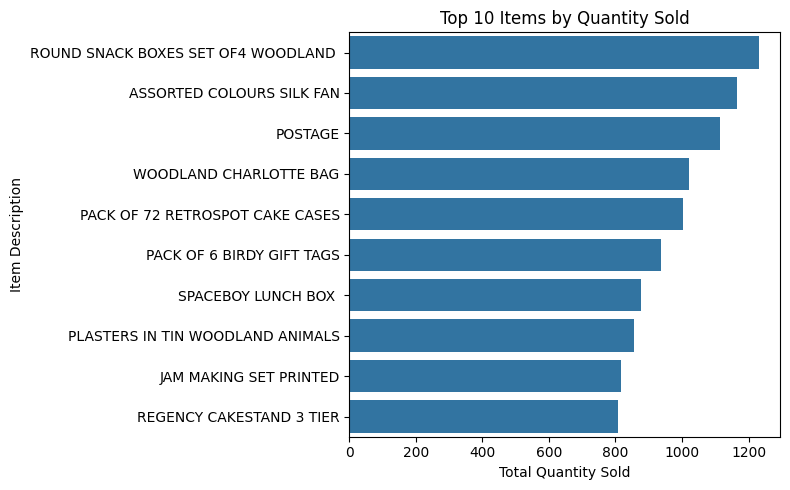

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sold_qty = (sales_df[sales_df['Quantity'] > 0]
            .groupby(['StockCode', 'Description'], dropna=False)['Quantity']
            .sum()
            .reset_index(name='SoldQty')
            .sort_values('SoldQty', ascending=False))

top10 = sold_qty.head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top10, x='SoldQty', y='Description')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Description')
plt.title('Top 10 Items by Quantity Sold')
plt.tight_layout()
plt.show()


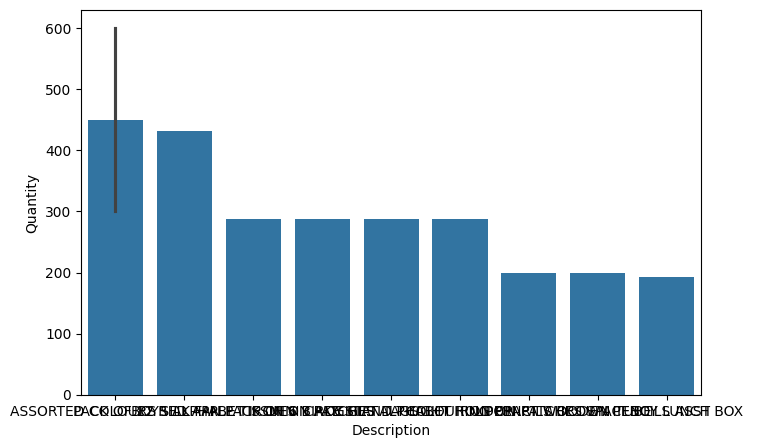

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_10,x='Description',y='Quantity')
plt.show()

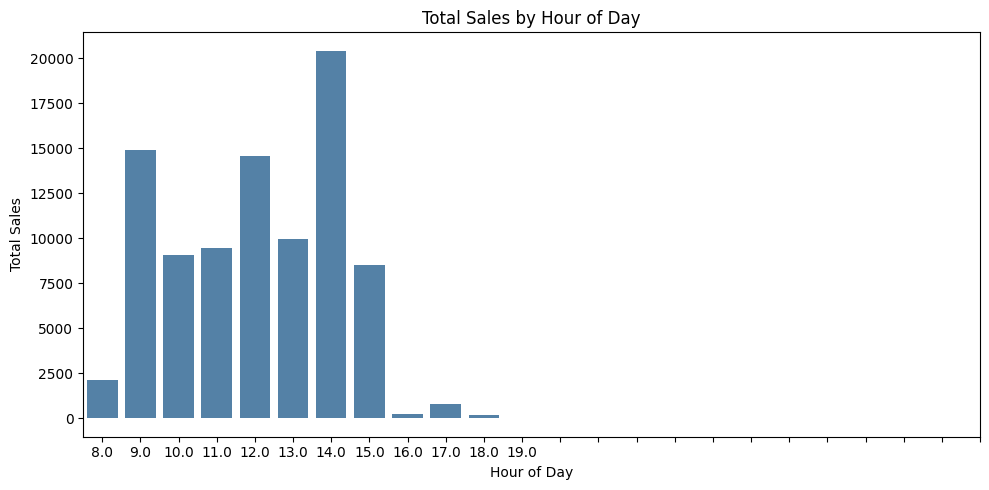

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'TotalPrice' not in sales_df.columns:
    sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']
if 'Hour' not in sales_df.columns:
    sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'], errors='coerce')
    sales_df['Hour'] = sales_df['InvoiceDate'].dt.hour

hourly = (sales_df.groupby('Hour', dropna=False)
          .agg(TotalSales=('TotalPrice', 'sum'),
               Transactions=('InvoiceNo', 'nunique'))
          .reset_index()
          .sort_values('Hour'))

plt.figure(figsize=(10,5))
sns.barplot(data=hourly, x='Hour', y='TotalSales', color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour of Day')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

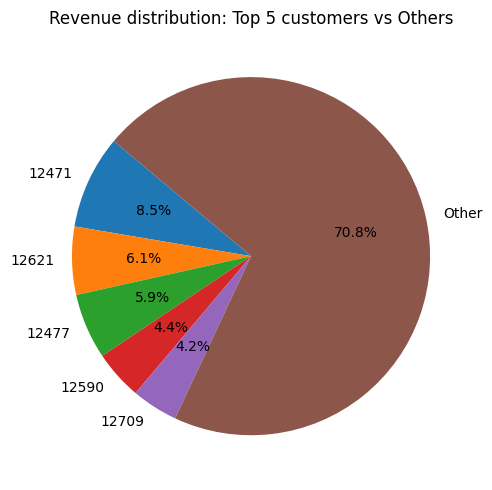

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure TotalPrice exists
if 'TotalPrice' not in sales_df.columns:
    sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

# Revenue by customer (exclude missing CustomerID)
revenue_by_customer = (sales_df.dropna(subset=['CustomerID'])
                       .groupby('CustomerID')['TotalPrice']
                       .sum()
                       .sort_values(ascending=False))

top5 = revenue_by_customer.head(5)
others = revenue_by_customer.iloc[5:].sum()
pie_data = pd.concat([top5, pd.Series({'Other': others})])

plt.figure(figsize=(6,5))
plt.pie(pie_data, labels=pie_data.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Revenue distribution: Top 5 customers vs Others')
plt.tight_layout()
plt.show()

C:\Users\kiran\AppData\Local\Temp\ipykernel_14480\3027141285.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['YearMonth'] = sales_df['InvoiceDate'].dt.to_period('M').astype(str)


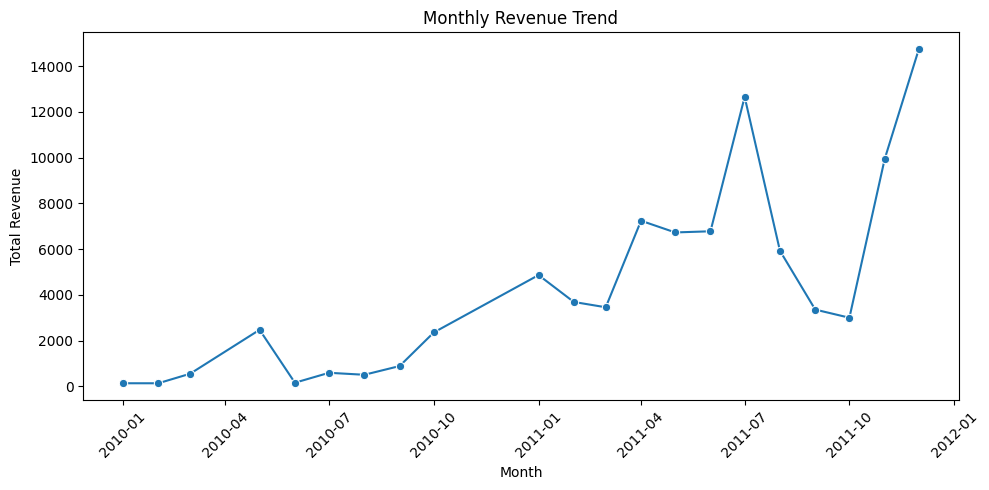

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

# ensure InvoiceDate and TotalPrice exist
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'], errors='coerce')
if 'TotalPrice' not in sales_df.columns:
    sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

sales_df = sales_df.dropna(subset=['InvoiceDate'])
sales_df['YearMonth'] = sales_df['InvoiceDate'].dt.to_period('M').astype(str)

monthly = (sales_df.groupby('YearMonth')
           .agg(TotalRevenue=('TotalPrice', 'sum'),
                Transactions=('InvoiceNo', 'nunique'))
           .reset_index())

monthly['YearMonth_dt'] = pd.to_datetime(monthly['YearMonth'])

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly.sort_values('YearMonth_dt'), x='YearMonth_dt', y='TotalRevenue', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\kiran\AppData\Local\Temp\ipykernel_14480\4179896465.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


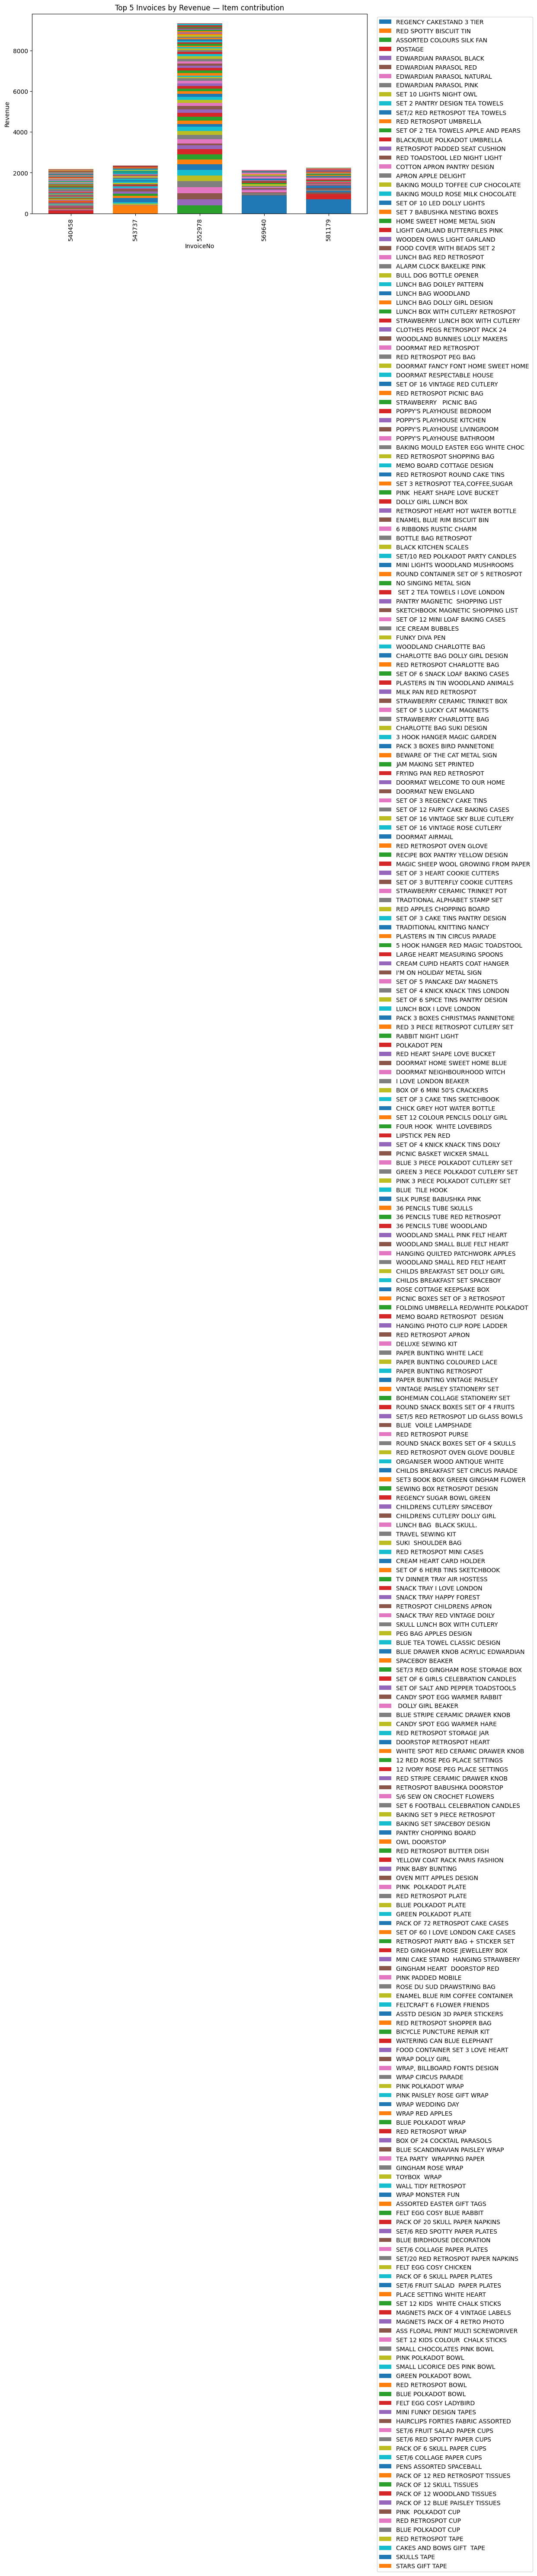

In [30]:
import matplotlib.pyplot as plt

# Ensure TotalPrice exists
if 'TotalPrice' not in sales_df.columns:
    sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

# Use only positive revenue lines and treat InvoiceNo as string
sales_pos = sales_df[sales_df['TotalPrice'] > 0].copy()
sales_pos['InvoiceNo'] = sales_pos['InvoiceNo'].astype(str)

# Top 5 invoices by total revenue
top_invoices = (sales_pos.groupby('InvoiceNo')['TotalPrice'].sum()
                .nlargest(5).index.tolist())

# Pivot to get revenue contribution per item for each top invoice
invoice_item = (sales_pos[sales_pos['InvoiceNo'].isin(top_invoices)]
                .groupby(['InvoiceNo', 'Description'])['TotalPrice'].sum()
                .reset_index()
                .pivot(index='InvoiceNo', columns='Description', values='TotalPrice')
                .fillna(0))

# Sort item columns by total contribution for consistent stacking
invoice_item = invoice_item[invoice_item.sum().sort_values(ascending=False).index]

# Plot stacked bar chart
plt.figure(figsize=(10,6))
invoice_item.plot(kind='bar', stacked=True, width=0.7, ax=plt.gca())
plt.ylabel('Revenue')
plt.title('Top 5 Invoices by Revenue — Item contribution')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [35]:
# Identify product with highest total revenue
if 'TotalPrice' not in sales_df.columns:
    sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

product_rev = (sales_df.groupby(['StockCode', 'Description'], dropna=False)['TotalPrice']
               .sum()
               .reset_index(name='TotalRevenue')
               .sort_values('TotalRevenue', ascending=False))

top_product = product_rev.iloc[0]
display(product_rev.head(5))


,StockCode,Description,TotalRevenue
1241,POST,POSTAGE,8221.00
507,22423,REGENCY CAKESTAND 3 TIER,2361.30
454,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1475.00
615,22629,SPACEBOY LUNCH BOX,927.45
456,22328,ROUND SNACK BOXES SET OF 4 FRUITS,879.10


In [ ]:
# Average order value per invoice

invoice_totals = sales_df.groupby('InvoiceNo', dropna=False)['TotalPrice'].sum()
pos_invoice_totals = invoice_totals[invoice_totals > 0]

avg_order_value = pos_invoice_totals.mean()
median_order_value = pos_invoice_totals.median()
n_invoices = len(pos_invoice_totals)

print(f'Average order value (per positive invoice): {avg_order_value:.2f} (n_invoices={n_invoices})')
print(f'Median order value: {median_order_value:.2f}')

Average order value (per positive invoice): 516.61 (n_invoices=182)
Median order value: 337.24


In [37]:
sales_df['InvoiceNo'] = sales_df['InvoiceNo'].astype(str)
transactions = (sales_df[sales_df['TotalPrice'] > 0]
                .dropna(subset=['CustomerID'])
                .drop_duplicates(subset=['CustomerID', 'InvoiceNo'])
                .groupby('CustomerID')['InvoiceNo']
                .nunique()
                .sort_values(ascending=False))

if len(transactions) == 0:
    print('No valid transactions found.')
else:
    top_customer = transactions.index[0]
    top_count = transactions.iloc[0]
    print(f'Customer with most transactions: {top_customer} (n_transactions={top_count})')
    display(transactions.head(10))


Customer with most transactions: 12569 (n_transactions=18)


C:\Users\kiran\AppData\Local\Temp\ipykernel_14480\2655009415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['InvoiceNo'] = sales_df['InvoiceNo'].astype(str)


CustomerID
12569    18
12720    13
12471    12
12712     8
12647     7
12709     6
12621     5
12662     5
12517     4
12708     4
Name: InvoiceNo, dtype: int64

In [38]:
if 'stock_df' not in globals():
    try:
        stock_df = pd.read_csv('StockDetails.csv')
    except Exception:
        stock_df = None

sales_codes = sales_df['StockCode'].astype(str).str.strip().dropna().unique()
if stock_df is None or 'StockCode' not in stock_df.columns:
    print('StockDetails not loaded or missing StockCode column.')
else:
    stock_codes = stock_df['StockCode'].astype(str).str.strip().dropna().unique()
    missing = sorted(set(sales_codes) - set(stock_codes))
    print(f'Products in sales missing from StockDetails: {len(missing)}')
    print('Sample missing StockCodes:', missing[:20])


Products in sales missing from StockDetails: 0
Sample missing StockCodes: []
